<a href="https://colab.research.google.com/github/S1ngularityPoint/Image-Processing/blob/main/2cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
img=cv.imread("cells1.jpg",cv.IMREAD_GRAYSCALE)

In [ ]:
from google.colab.patches import cv2_imshow

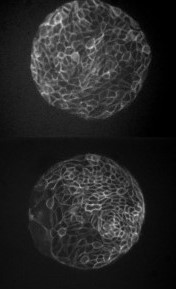

In [ ]:
cv2_imshow(img)


In [ ]:
print(img.shape)

(289, 176)


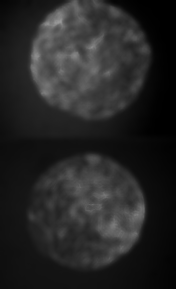

In [ ]:
blur = cv.bilateralFilter(img,9,75,75)
cv2_imshow(blur)

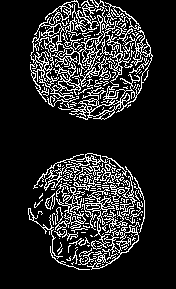

In [ ]:
cannyorg=cv.Canny(img,60,100)
cv2_imshow(cannyorg)

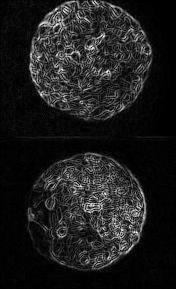

In [ ]:

grad_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

cv2_imshow(grad)


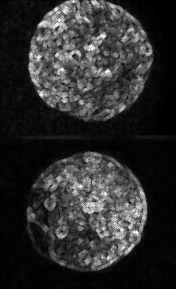

In [ ]:
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
upd_sobel = cv.dilate(grad,kernel,iterations = 1)
cv2_imshow(upd_sobel)

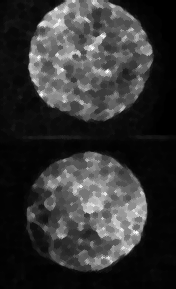

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
res = cv.morphologyEx(upd_sobel,cv.MORPH_CLOSE,kernel)
cv2_imshow(res)

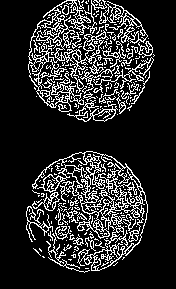

In [ ]:
canny=cv.Canny(upd_sobel,90,120)
cv2_imshow(canny)

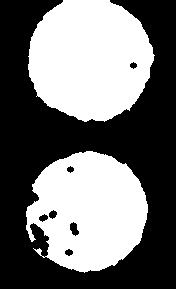

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
res = cv.morphologyEx(canny,cv.MORPH_CLOSE,kernel)
cv2_imshow(res)

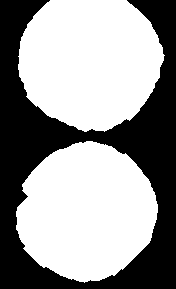

In [ ]:
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
upd_res = cv.dilate(res,kernel,iterations = 10)
cv2_imshow(upd_res)

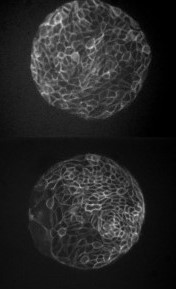

In [ ]:
cv2_imshow(img)

Therefore,we segmented the cells almost perfectly using Sobel edge detection followed by morphological changes